# **A - Chargement des bibliothèques et fonctions: à executer**

In [1]:
## pas besoins de lancer ce code : instalation de google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## à lancer pour importer les bibliothèques nécessaires. (selenieum ne fonctionne pas sur le web)
import warnings
warnings.filterwarnings("ignore")
from time import sleep
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
import numpy as np
# from bs4 import BeautifulSoup as bs
import requests
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [6]:
### fonction visulalisation d'un avis cliens : choisir un indice
def afficher (df,indice):
# indice = 5
  print('Valeurs pour indice',indice)
  for colonne in df.columns:
    print(colonne , ':------>',df[colonne][indice],'')


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Téléchargement des ressources nécessaires pour NLTK
nltk.download('vader_lexicon')

# Initialisation de l'analyseur de sentiments
sia = SentimentIntensityAnalyzer()
# def analyse_sentiments(text):
#   # Analyse de sentiment
#   sentiment_scores = sia.polarity_scores(text)
#   # Interprétation des scores
#   compound_score = sentiment_scores['compound']
#   if compound_score >= 0.05:
#       sentiment_label = "positive"
#   elif compound_score <= -0.05:
#       sentiment_label = "negative"
#   else:
#       sentiment_label = -"neutral"
#   return sentiment_label #,compound_score

  # Initialisation de l'analyseur de sentiments

def analyse_sentiments(text):
  # Analyse de sentiment
  sentiment_scores = sia.polarity_scores(text)
  # Interprétation des scores
  compound_score = sentiment_scores['compound']
  if compound_score >= 0:
      sentiment_label = 1 #"positive"
  else:
      sentiment_label = 0 #"negative"
  return sentiment_label #,compound_score

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
pd.set_option('display.max_rows', None) ## pour afficher toutes les lignes d'un df
pd.set_option('display.max_columns', None) ## pour afficher toutes les colonnes d'un df

## pour remettre les paramètres par défaut:

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [11]:
!pip install scikit-plot

# **B - Modélisation**

In [12]:
### chargement et lecture de fichier Final_data_scraped_traité_traduit
import pandas as pd
df_0 = pd.read_excel('/content/drive/MyDrive/Projet Datascientest/Datas/Final_data_scraped_traité_traduit_ok_fini.xlsx')

In [ ]:
# mask = df.isna().any(axis=1)
# # Utilisez ce masque pour extraire les lignes avec des valeurs manquantes dans un nouveau DataFrame df_vm
# df_vm = df[mask]
# df_vm.info()

def VM(dff,column_name):
  mask = pd.isna(dff[column_name])
  df_vm = dff[mask]
  return df_vm


## Préparation des données

In [13]:
## réinitialisation des données
df = df_0

In [ ]:
## afficher les lignes avec valeurs manquantes dans une colonne x
# display(VM(df,'commentaire_en_sans_SW'))
## supprimer les lignes avec valeurs manquantes dans la colonne : commentaire_en_sans_SW
print('Valeurs manquantes:')
valeurs_manquantes= df.isna().sum()
valeurs_manquantes[valeurs_manquantes>0]

df = df.dropna(subset=['commentaire_en_sans_SW'])
print('Les valeurs manquantes de la colonne spécifiées  sont supprimées')

Valeurs manquantes:
Les valeurs manquantes de la colonne spécifiées  sont supprimées


Cette partie permet de:
- transformer la colonne commentaire_en_sans_SW, et de trouver les mots les plus utilisés.
- Ajouter une colonne : analyse sentiments

In [ ]:
import os
nltk_data_folder = os.path.join(os.getcwd(), 'nltk_data')
os.environ['NLTK_DATA'] = nltk_data_folder
print(os.environ['NLTK_DATA'])

/content/nltk_data


In [ ]:
## nettoyage et cleanning de la colonne commentaire_en_sans SW

import nltk
nltk.download('wordnet')
from nltk.corpus import words
nltk.download('words')#les mots anglais de nltk sont téléchargés

# nltk.download('wordnet', download_dir=nltk_data_folder)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

## supprimer les points, virgules...
df['commentaire_en_sans_SW'] = df['commentaire_en_sans_SW'].str.replace('[^\w\s]', ' ')

df['stemmed'] = [[wordnet_lemmatizer.lemmatize(word, pos="v") for word in review.split()] for review in df['commentaire_en_sans_SW']]
## transformer le text en miniscule
df['lower_cased']=[[word.lower() for word in s] for s in df['stemmed']]

# importing stopwors from nltk library
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('stopwords', download_dir=nltk_data_folder)
from nltk.corpus import stopwords
a = set(stopwords.words("english"))
# ajout colonne sans stop word
df['stopwordsremoved']=[[word for word in s if word not in a] for s in df['lower_cased']]

## supprimer les mots qui ne sont pas dans le dictionnaire anglais
english_words = set(words.words())
df['filtered_words']=[[word for word in s if word in english_words] for s in df['stopwordsremoved']]

## concatener les mot
df['commentaire_clean'] = [' '.join(review) for review in df['filtered_words']]

## création d'une nouvelle colonne "Analyse_sentiment_commentaire"
df['sentiment_commentaire'] = df['commentaire_clean'].apply(lambda x: analyse_sentiments(x))
# df= pd.get_dummies(df, columns=['sentiment_commentaire'], prefix='sentiment')

## supprimer les colonnes inutiles
colonnes_à_supprimer = ['commentaire_en_sans_SW', 'stemmed','lower_cased', 'stopwordsremoved', 'filtered_words']
df = df.drop(columns = colonnes_à_supprimer)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# # Supprission des colonnes inutiles
# colonnes_à_supprimer = [ 'companies', 'noms', 'titre_com', 'commentaire', 'verif_reponses',
#        'reponses',  'date_experience', 'date_commentaire', 'site', 'nombre_pages', 'date_scrap',  'année_experience',
#        'mois_experience', 'jour_experience', 'année_commentaire','mois_commentaire', 'jour_commentaire', 'leadtime_com_exp','caractères_spé',
#        'commentaire_text','commentaire_en', 'verif_traduction', 'commentaire_en_bis','cat_nombre_caractères','cat_nombre_maj']
#       #  , 'nombre_point_intero','nombre_point_exclam','categorie_bis','langue']

# ## supprimer les colonnes inutiles
# df = df.drop(columns=colonnes_à_supprimer)

# ##!!!! laiser la colonne catégorie_bis et faire de nouveaux regroupements: finance, mode, technologie...

In [ ]:
#Affiche le nombre de doublons
print("Avant suppression duplicates", df.shape)

nombre_doublon = df.duplicated().sum()
print("Nombre de doublons :", nombre_doublon)

#Supprime les doublons
df = df.drop_duplicates()
print(nombre_doublon , "lignes doublons supprimées:")

print("Après suppression duplicates", df.shape)


Avant suppression duplicates (65455, 39)
Nombre de doublons : 363
363 lignes doublons supprimées:
Après suppression duplicates (65092, 39)


In [ ]:
### afficher les infos de df
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65092 entries, 0 to 65459
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   categorie_bis          65092 non-null  object        
 1   companies              65092 non-null  object        
 2   noms                   65088 non-null  object        
 3   titre_com              65092 non-null  object        
 4   commentaire            65092 non-null  object        
 5   reponses               17602 non-null  object        
 6   notes                  65092 non-null  int64         
 7   date_experience        65092 non-null  datetime64[ns]
 8   date_commentaire       65092 non-null  datetime64[ns]
 9   site                   65092 non-null  object        
 10  nombre_pages           65092 non-null  int64         
 11  date_scrap             65092 non-null  object        
 12  verified               65092 non-null  int64         
 13  a

## DataVIZ

In [ ]:
# Supprission des colonnes inutiles
colonnes_à_supprimer = [ 'companies', 'noms', 'titre_com', 'commentaire', 'verif_reponses',
       'reponses',  'date_experience', 'date_commentaire', 'site', 'nombre_pages', 'date_scrap',  'année_experience',
       'mois_experience', 'jour_experience', 'année_commentaire','mois_commentaire', 'jour_commentaire', 'leadtime_com_exp','caractères_spé',
       'commentaire_text','commentaire_en', 'verif_traduction', 'commentaire_en_bis','cat_nombre_caractères','cat_nombre_maj']
      #  , 'nombre_point_intero','nombre_point_exclam','categorie_bis','langue']

## supprimer les colonnes inutiles
df_v = df.drop(columns=colonnes_à_supprimer)

##!!!! laiser la colonne catégorie_bis et faire de nouveaux regroupements: finance, mode, technologie...

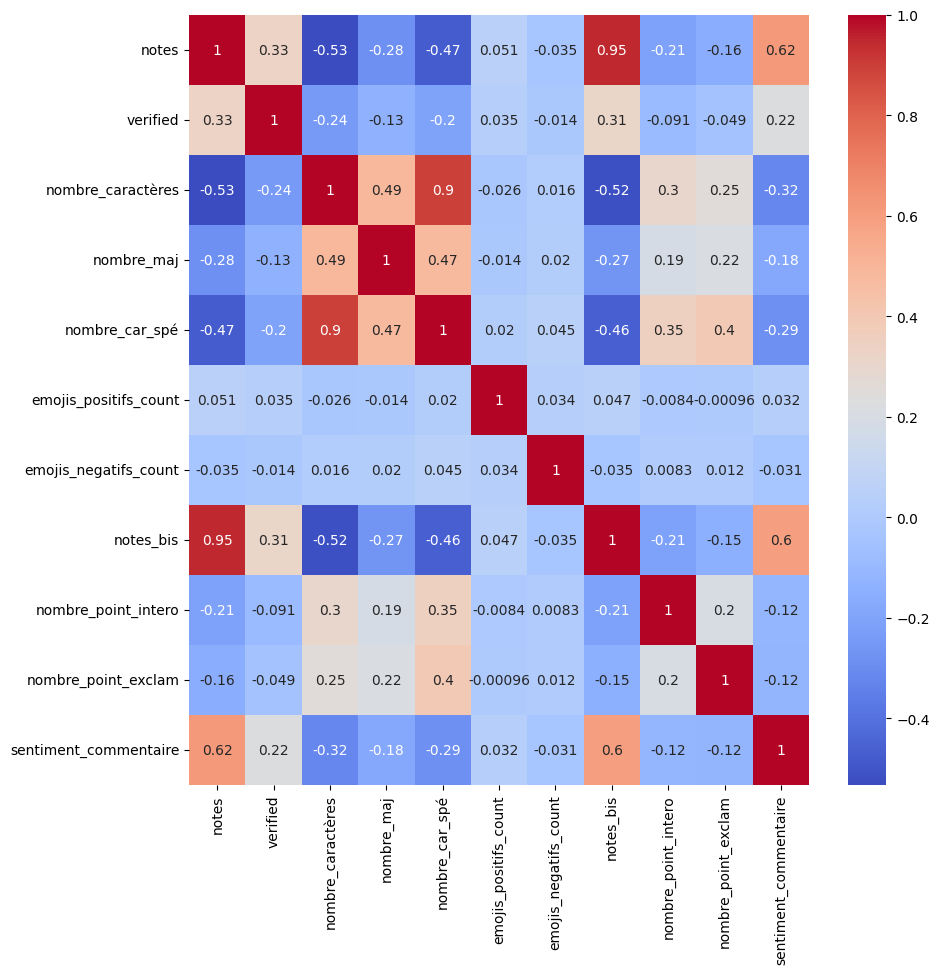

In [ ]:
cor = df_v.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');


[Text(0, 0.5, ''), Text(0.5, 0, "Nombre d'avis par catégories (secteurs)")]

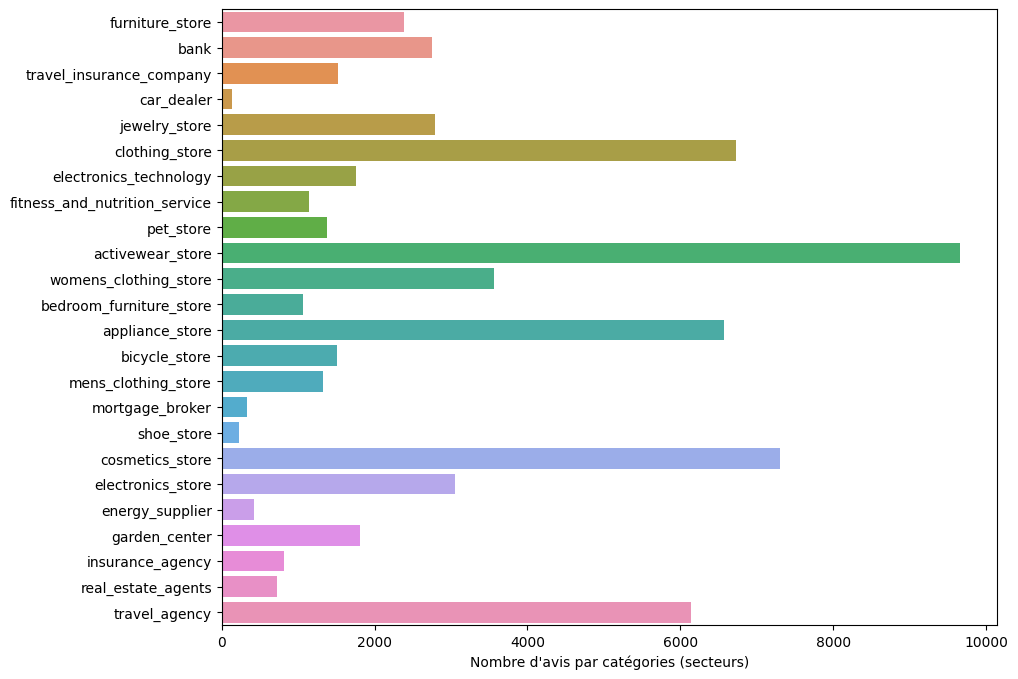

In [ ]:
## autres graphes
df_v['categorie_bis'].value_counts()
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot (y = 'categorie_bis', data = df_v)
# Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="", xlabel="Nombre d'avis par catégories (secteurs)")
# sns.despine(left=True, bottom=True)

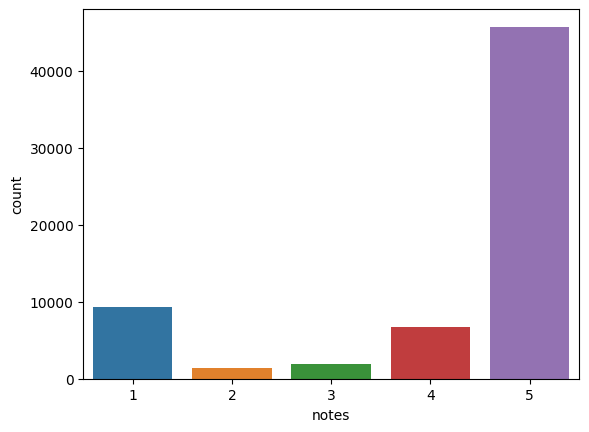

In [ ]:
sns.countplot (x = 'notes', data = df_v);



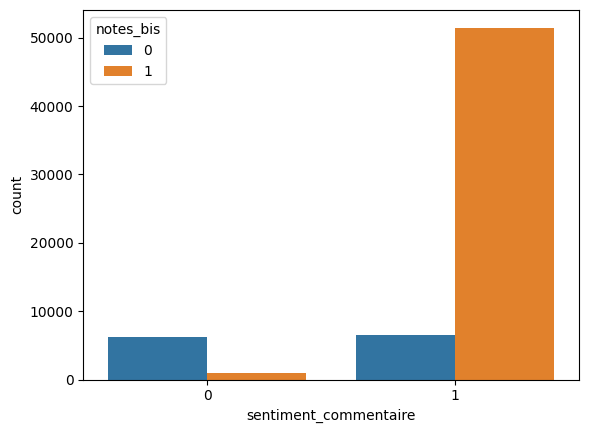

In [ ]:
sns.countplot (x = 'sentiment_commentaire', hue = 'notes_bis', data = df_v);

dans cette partie, nous allons comparer le resultat obtenu avec l'analyse des sentiments et les notes rélles des avis (notes_bis).
on remarque que les deux informations sont cohérentes. nous avons une corrélation d'environ 60 %.

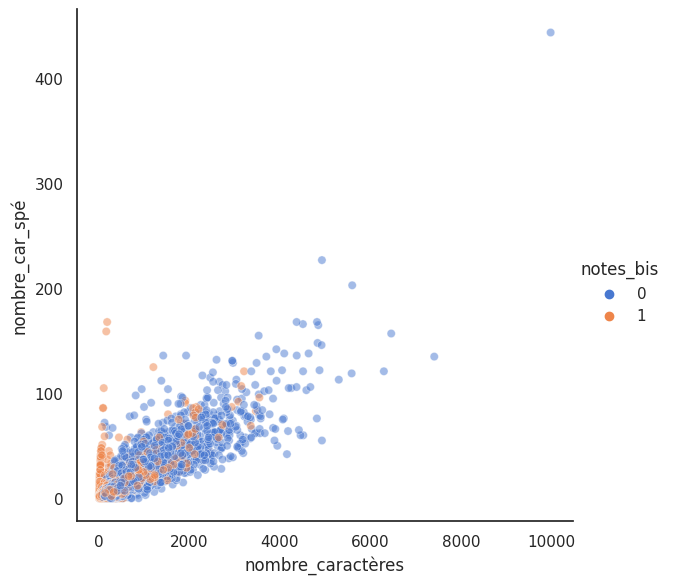

In [ ]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="nombre_caractères", y="nombre_car_spé", hue="notes_bis", #size="sentiment_commentaire",
            sizes=(40, 400), alpha=.5, palette="muted",  height=6, data = df_v)

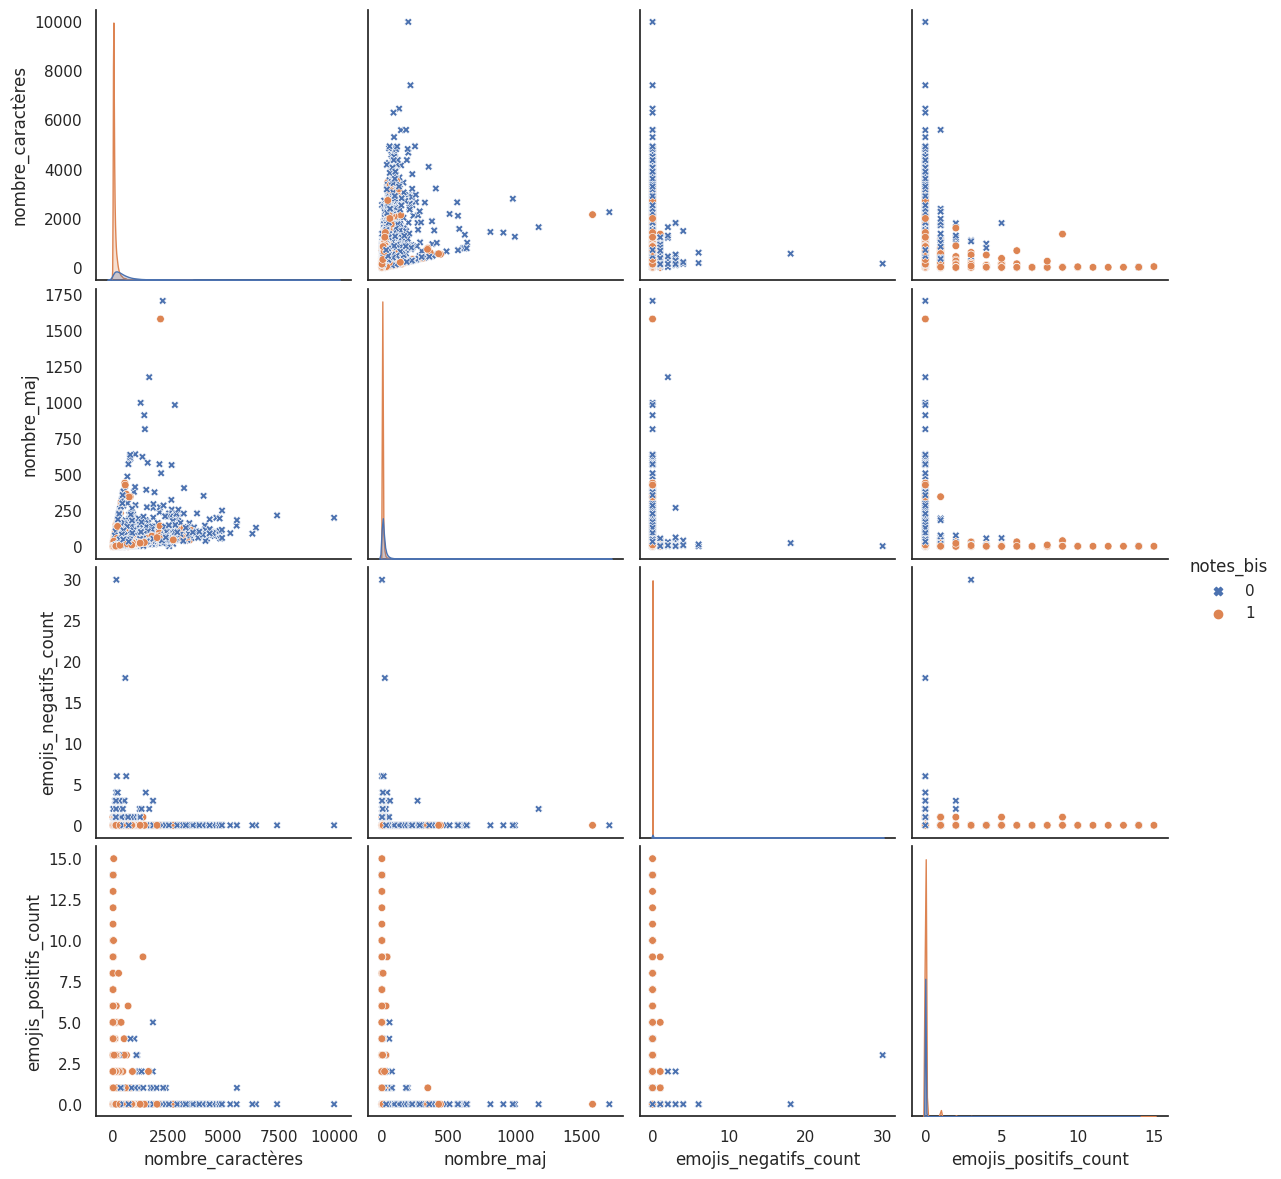

In [ ]:
import seaborn as sns
# sns.set_theme(style="ticks")
sns.set_theme(style="white")
# df = sns.load_dataset("penguins")
# sns.pairplot(df, hue="notes")

sns.pairplot(data = df_v, hue='notes_bis',
# vars=['nombre_car', 'nombre_maj','nombre_point_intero', 'nombre_point_exclam','emojis_négatifs_count', 'emojis_positifs_count'],
vars=['nombre_caractères', 'nombre_maj','emojis_negatifs_count', 'emojis_positifs_count'],

height=3, plot_kws={"s": 30},
markers=['X','o'])

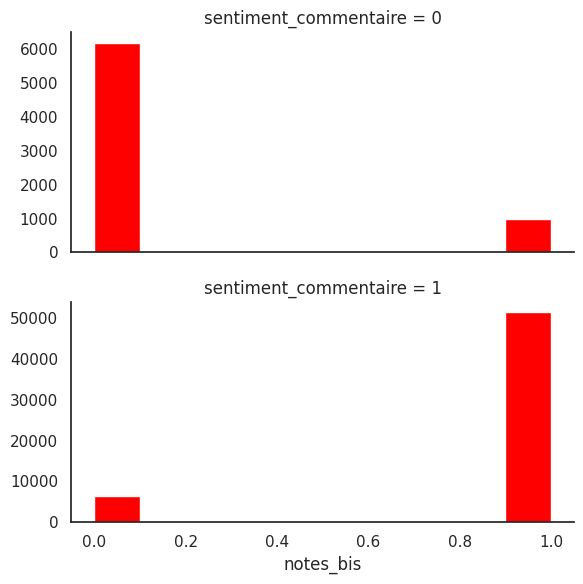

In [ ]:

g = sns.FacetGrid(df_v, row='sentiment_commentaire', height=3, aspect=2,sharey=False)
g.map(plt.hist, 'notes_bis', color='red');




---



## identifier les mots les plus utilisés

In [ ]:
# Définir la variable text
# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords
#Importer les packages nécessaires
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))
# print(stop_words)

df1 = df.loc[df['notes'] == 1]
df2 = df.loc[df['notes'] == 2]
df3 = df.loc[df['notes'] == 3]
df4 = df.loc[df['notes'] == 4]
df5 = df.loc[df['notes'] == 5]

### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text1 pour la note 1
text1 = ""
for comment in df1['commentaire_clean']:
    text1 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text2 pour la note 2
text2 = ""
for comment in df2['commentaire_clean']:
    text2 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text3 pour la note 3
text3 = ""
for comment in df3['commentaire_clean']:
    text3 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text4 pour la note 4
text4 = ""
for comment in df4['commentaire_clean']:
    text4 += comment
### regrouper le text de colonne "commentaire_en_sans_SW" dans une varialble text5 pour la note 5
text5 = ""
for comment in df5['commentaire_clean']:
    text5 += comment

print('dimension de text1:',len(text1))
print('dimension de text2:',len(text2))
print('dimension de text3:',len(text3))
print('dimension de text4:',len(text4))
print('dimension de text5:',len(text5))

text_total = text1 + text2 + text3 + text4 + text5
print('\ndimension de text_total:',len(text_total))


dimension de text1: 2618424
dimension de text2: 302732
dimension de text3: 268806
dimension de text4: 431797
dimension de text5: 2089901

dimension de text_total: 5711660


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%matplotlib inline
# Définir le calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)


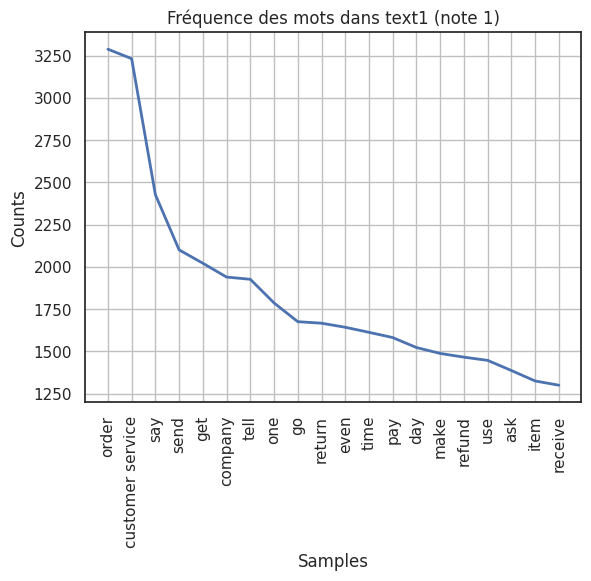

In [ ]:
# Générer et afficher le nuage de mots pour la note 1

# plt.figure(figsize= (8,6)) # Initialisation d'une figure
# wc.generate(text1)           # "Calcul" du wordcloud
# plt.imshow(wc) # Affichage
# plt.show()

words1 = wc.process_text(text1)
freq = nltk.FreqDist(words1)
freq.plot(20,title="Fréquence des mots dans text1 (note 1)");

# Créer le DataFrame
freq_dict = dict(freq)
df11 = pd.DataFrame(list(freq_dict.items()), columns=['Mot', 'Fréquence'])
df11['note'] = 1


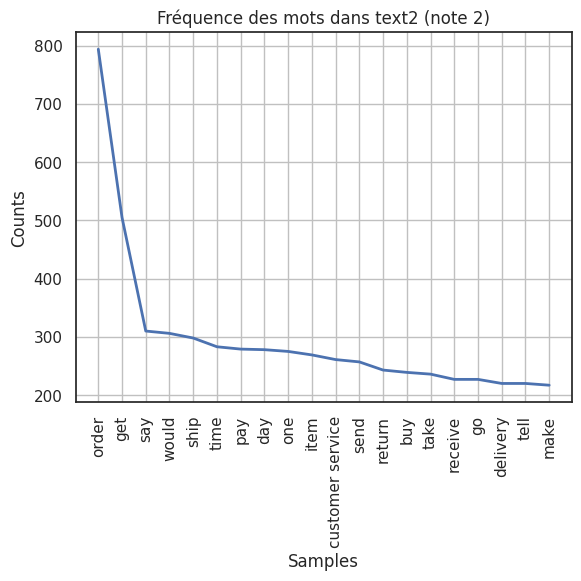

In [ ]:
# Générer et afficher le nuage de mots pour la note 2

# plt.figure(figsize= (10,6)) # Initialisation d'une figure
# wc.generate(text2)           # "Calcul" du wordcloud
# plt.imshow(wc) # Affichage
# plt.show()

words2 = wc.process_text(text2)
freq = nltk.FreqDist(words2)
freq.plot(20,title="Fréquence des mots dans text2 (note 2)");
# Créer le DataFrame
freq_dict = dict(freq)
df22 = pd.DataFrame(list(freq_dict.items()), columns=['Mot', 'Fréquence'])
df22['note'] = 2

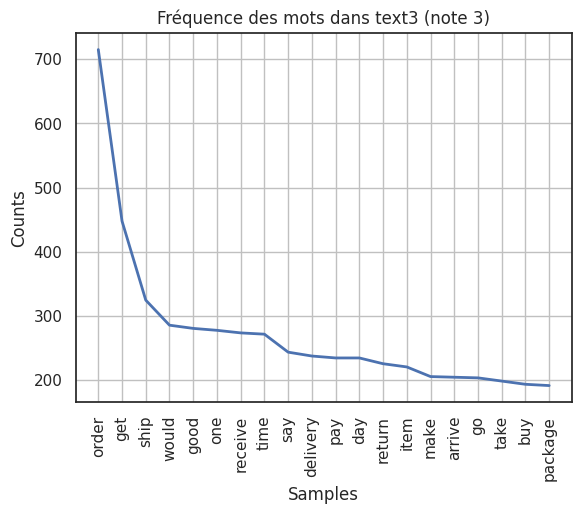

In [ ]:
# Générer et afficher le nuage de mots pour la note 3

# plt.figure(figsize= (10,6)) # Initialisation d'une figure
# wc.generate(text3)           # "Calcul" du wordcloud
# plt.imshow(wc) # Affichage
# plt.show()

words3 = wc.process_text(text3)
freq = nltk.FreqDist(words3)
freq.plot(20,title="Fréquence des mots dans text3 (note 3)");
# Créer le DataFrame
freq_dict = dict(freq)
df33 = pd.DataFrame(list(freq_dict.items()), columns=['Mot', 'Fréquence'])
df33['note'] = 3

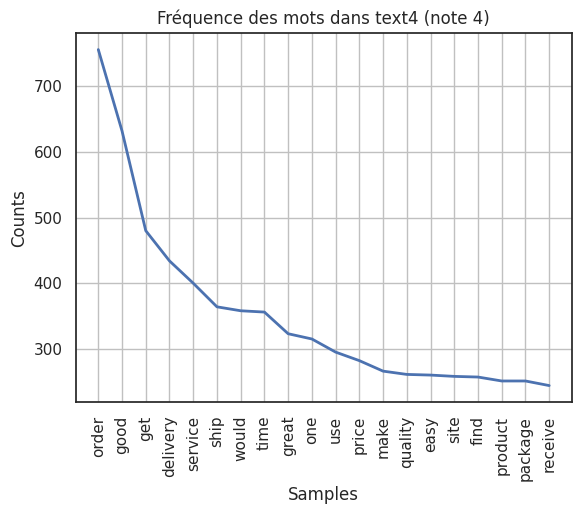

In [ ]:
# Générer et afficher le nuage de mots pour la note 4

# plt.figure(figsize= (10,6)) # Initialisation d'une figure
# wc.generate(text4)           # "Calcul" du wordcloud
# plt.imshow(wc) # Affichage
# plt.show()

words4 = wc.process_text(text4)
freq = nltk.FreqDist(words4)
freq.plot(20,title="Fréquence des mots dans text4 (note 4)");
# Créer le DataFrame
freq_dict = dict(freq)
df44 = pd.DataFrame(list(freq_dict.items()), columns=['Mot', 'Fréquence'])
df44['note'] = 4

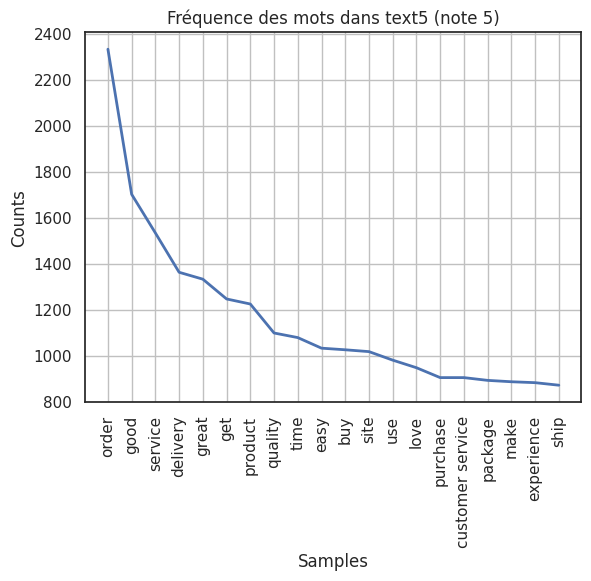

In [ ]:
# Générer et afficher le nuage de mots pour la note 5

# plt.figure(figsize= (10,6)) # Initialisation d'une figure
# wc.generate(text5)           # "Calcul" du wordcloud
# plt.imshow(wc) # Affichage
# plt.show()

words5 = wc.process_text(text5)
freq = nltk.FreqDist(words5)
freq.plot(20,title="Fréquence des mots dans text5 (note 5)");
# Créer le DataFrame
freq_dict = dict(freq)
df55 = pd.DataFrame(list(freq_dict.items()), columns=['Mot', 'Fréquence'])
df55['note'] = 5

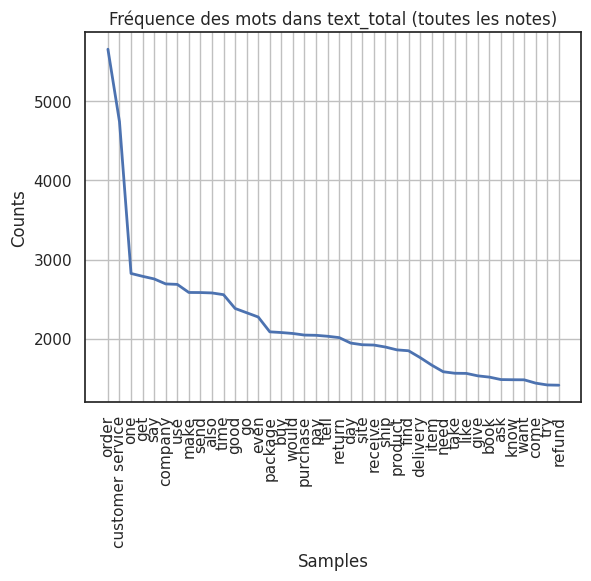

In [ ]:
## cacatenner les dfxx
# Créer une liste contenant vos DataFrames
dfs = [df11, df22, df33, df44, df55]
# Concaténer les DataFrames
df_result = pd.concat(dfs, ignore_index=True)
# Afficher le résultat
df_result.head()
## fréquence des mots pour tputes les notes
words_t = wc.process_text(text_total)
freq = nltk.FreqDist(words_t)
freq.plot(40,title="Fréquence des mots dans text_total (toutes les notes)");

In [ ]:
## df avec fréquence des mots par note
print(df_result.shape)
df_result = df_result.sort_values(by=['note', 'Fréquence'], ascending=[True, False])
df_result.head()

(66781, 3)


,Mot,Fréquence,note
1,order,3289,1
15002,customer service,3233,1
126,say,2428,1
145,send,2101,1
54,get,2022,1


In [ ]:
import nltk
from nltk.corpus import words

# Téléchargez la liste de mots anglais si ce n'est pas déjà fait
nltk.download('words')

# Obtenir la liste de mots anglais
mots_anglais = set(words.words())

# Filtrer la colonne 'mots' pour ne conserver que les mots anglais
df_result['Mot'] = df_result['Mot'].apply(lambda mot: mot if mot in mots_anglais else None)

# Supprimer les lignes contenant des mots non anglais
df_result = df_result.dropna()

# Réinitialiser l'index si nécessaire
df_result = df_result.reset_index(drop=True)

# Afficher le DataFrame résultant
df_result.head()


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


,Mot,Fréquence,note
0,order,3289,1
1,say,2428,1
2,send,2101,1
3,get,2022,1
4,company,1940,1


## optimisation de la liste de mots

L'objectif de cette partie est de supprimer les mots qui apparaissent dans toutes les notes. Ensuite prendre les plus utilisés

In [ ]:

df_result_dummies = pd.get_dummies(df_result['note'], prefix='note')
df_result = pd.concat([df_result, df_result_dummies], axis=1)
df_result.head()
df_result['note_1'] = df_result['note_1'].astype('float')
df_result['note_2'] = df_result['note_2'].astype('float')
df_result['note_3'] = df_result['note_3'].astype('float')
df_result['note_4'] = df_result['note_4'].astype('float')
df_result['note_5'] = df_result['note_5'].astype('float')

df_result['note_sum'] = df_result['note_1'] + df_result['note_2']+df_result['note_3'] + df_result['note_4']+df_result['note_5']

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24157 entries, 0 to 24156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mot        24157 non-null  object 
 1   Fréquence  24157 non-null  int64  
 2   note       24157 non-null  int64  
 3   note_1     24157 non-null  float64
 4   note_2     24157 non-null  float64
 5   note_3     24157 non-null  float64
 6   note_4     24157 non-null  float64
 7   note_5     24157 non-null  float64
 8   note_sum   24157 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.7+ MB


Maintenant nous allons faire la somme des colonnes : note_1, note_2, note_3, note_4, note_5,
Si la somme = 5 cela veut dire que le mot est commun à toutes les notes: onne le prendera en compte dans ce cas.

In [ ]:
df_result.head()

,Mot,Fréquence,note,note_1,note_2,note_3,note_4,note_5,note_sum
0,order,3289,1,1.0,0.0,0.0,0.0,0.0,1.0
1,say,2428,1,1.0,0.0,0.0,0.0,0.0,1.0
2,send,2101,1,1.0,0.0,0.0,0.0,0.0,1.0
3,get,2022,1,1.0,0.0,0.0,0.0,0.0,1.0
4,company,1940,1,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# print(df_result.loc[df_result['note_sum']==1])
# df_result.loc[df_result['Mot']=="order"]
df_result['note_sum'].unique()
df_result.describe()

,Fréquence,note,note_1,note_2,note_3,note_4,note_5,note_sum
count,24157.000000,24157.000000,24157.000000,24157.000000,24157.000000,24157.000000,24157.000000,24157.0
mean,20.890963,2.900815,0.308772,0.145506,0.135447,0.156683,0.253591,1.0
std,89.352481,1.594337,0.461996,0.352618,0.342208,0.363510,0.435075,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,3289.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
## il faut faire un pivote table par mot:
pivot_table = pd.pivot_table(df_result, values='note_sum', columns='Mot' , aggfunc='sum', fill_value=0)
# pivot_table = pd.pivot_table(df_result, values='Mot', columns='note_sum' , aggfunc='sum', fill_value=0)
display(pivot_table)
grouped_df = df_result.groupby(['Mot', 'note_sum']).agg({'Fréquence': 'sum'}).reset_index()
grouped_df

Mot,aa,abandon,abbey,abdicate,abide,ability,abject,able,abnormal,abnormally,...,zesty,zig,zigzag,zip,zipper,zirconia,zodiac,zombie,zone,zoom
note_sum,1,3,1,1,2,5,1,5,1,1,...,1,2,1,5,4,1,1,1,2,3


,Mot,note_sum,Fréquence
0,aa,1.0,1
1,abandon,1.0,12
2,abbey,1.0,1
3,abdicate,1.0,1
4,abide,1.0,3
...,...,...,...
10062,zirconia,1.0,1
10063,zodiac,1.0,1
10064,zombie,1.0,1
10065,zone,1.0,19


In [ ]:
print(grouped_df['note_sum'].unique())
grouped_df.describe()

[1.]


,note_sum,Fréquence
count,10067.0,10067.000000
mean,1.0,50.130426
std,0.0,228.043283
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,3.000000
75%,1.0,15.000000
max,1.0,7888.000000


In [ ]:
## creer un petit df pour tester

df_p = df[0:100]

## on applique un algorithme à la colonne stemmed_concat: à analyser!!
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(df_p["commentaire_clean"])
# print(bag_of_words)

### trouver les mots uniques
feature_names = count_vectorizer.get_feature_names_out()
print(len(feature_names))
print(feature_names)
# df_p.head()

357
['able' 'absolutely' 'accordance' 'ago' 'almost' 'already' 'also' 'always'
 'amaze' 'amortize' 'amount' 'anyway' 'apartment' 'apprise' 'around'
 'arrive' 'article' 'ask' 'assemble' 'assist' 'august' 'available' 'avoid'
 'aware' 'back' 'beautiful' 'bed' 'bedside' 'believe' 'best' 'bite' 'blue'
 'bluffy' 'bon' 'bough' 'bring' 'build' 'bundle' 'buy' 'case' 'chain'
 'chair' 'chandelier' 'change' 'chest' 'chic' 'child' 'choice' 'choose'
 'class' 'classy' 'clear' 'climb' 'close' 'code' 'coffee' 'color' 'colour'
 'come' 'common' 'communicate' 'communication' 'company' 'complete'
 'compliant' 'compliment' 'conform' 'considerable' 'consistent' 'contact'
 'corner' 'correspond' 'costumer' 'could' 'count' 'create' 'crowd'
 'curtain' 'customer' 'damage' 'dark' 'date' 'day' 'days' 'deception'
 'definitely' 'delay' 'deliver' 'delivery' 'demand' 'depend' 'describe'
 'description' 'design' 'destination' 'detail' 'develop' 'different'
 'directly' 'discount' 'drawer' 'drawers' 'easier' 'easily' 'easy

In [ ]:
import pandas as pd
# Regrouper les mots par catégorie dans un dictionnaire
words_by_category = df_p.groupby('notes_bis')['commentaire_clean'].apply(set).to_dict()

# Obtenir l'intersection des ensembles de mots
common_words = set.intersection(*words_by_category.values())

# Afficher les mots communs
print(common_words)
# words_by_category

set()


In [ ]:
## parcourir tous les mots et identifier ceux qui apparaissent sur toutes les notes
categories = {
    1: ['mot1', 'mot2', 'mot3', 'mot4'],
    2: ['mot2', 'mot3', 'mot5', 'mot6'],
    3: ['mot1', 'mot3', 'mot5', 'mot7'],
    4: ['mot2', 'mot3', 'mot7', 'mot8'],
    5: ['mot1', 'mot3', 'mot5', 'mot8']
}

# Créer des ensembles pour chaque catégorie
sets_by_category = {category: set(words) for category, words in categories.items()}

# Trouver l'intersection des ensembles
common_words = set.intersection(*sets_by_category.values())

# Afficher les mots communs
print(common_words)


{'mot3'}


H stack

In [ ]:
## création d'un dataframe avec les données et une colonne par mot unique
show_features_df = pd.DataFrame.from_dict({feature_name: bag_of_words.toarray()[:, c] for c, feature_name in enumerate(feature_names)})
show_features_df


,able,absolutely,accordance,ago,almost,already,also,always,amaze,amortize,...,wait,wall,want,way,welcome,well,worth,would,wrap,wrong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,2,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## concatenner le show_features_df avec notre df dans un nouveau dataframe : result
df_p = df_p.reset_index(drop=True)
print('dimension df de base:' ,df_p.shape)

show_features_df = show_features_df.reset_index(drop=True)
print('dimension features_df:' ,show_features_df.shape)

result = pd.concat([df_p, show_features_df], axis=1)
# result = result.reset_index(drop=True)
print('dimension de nouveau df result:' ,result.shape)
result.head()


dimension df de base: (100, 14)
dimension features_df: (100, 357)
dimension de nouveau df result: (100, 371)


,categorie_bis,notes,verified,nombre_caractères,nombre_maj,nombre_car_spé,emojis_positifs_count,emojis_negatifs_count,langue,notes_bis,...,wait,wall,want,way,welcome,well,worth,would,wrap,wrong
0,furniture_store,1,0,119,4,1,0,0,en,0,...,0,0,0,0,0,0,0,0,0,0
1,furniture_store,5,0,103,4,3,0,0,fr,1,...,0,0,0,0,0,0,0,0,0,0
2,furniture_store,5,0,37,1,1,0,0,en,1,...,0,0,0,0,0,0,0,0,0,0
3,furniture_store,5,0,325,7,13,0,0,en,1,...,2,0,0,0,0,0,2,0,0,0
4,furniture_store,4,0,344,9,7,0,0,en,1,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# On créer une variable qui compte l'occurence d'apparition des mots fréquents (ici customer service)
df['customer-service'] = df['commentaire_en_bis'].str.count('customer service')

print(df['customer service'])


0        0
1        0
2        0
3        0
4        0
        ..
65455    1
65456    0
65457    0
65458    0
65459    1
Name: customer service, Length: 65460, dtype: int64


In [18]:
# On créer une variable qui compte l'occurence d'apparition des mots fréquents (ici refund)
df['refund'] = df['commentaire_en_bis'].str.count('refund')

print(df['refund'])

0        0
1        0
2        0
3        0
4        0
        ..
65455    0
65456    0
65457    0
65458    0
65459    0
Name: refund, Length: 65460, dtype: int64


In [19]:
# On créer une variable qui compte l'occurence d'apparition des mots fréquents (ici return)
df['return'] = df['commentaire_en_bis'].str.count('return')

print(df['return'])

0        0
1        0
2        0
3        0
4        0
        ..
65455    0
65456    0
65457    0
65458    2
65459    0
Name: return, Length: 65460, dtype: int64


In [20]:
# On créer une variable qui compte l'occurence d'apparition des mots fréquents (ici good)
df['good'] = df['commentaire_en_bis'].str.count('good')

print(df['good'])

0        0
1        0
2        0
3        0
4        1
        ..
65455    0
65456    0
65457    1
65458    0
65459    0
Name: good, Length: 65460, dtype: int64


In [21]:
# On créer une variable qui compte l'occurence d'apparition des mots fréquents (ici great)
df['great'] = df['commentaire_en_bis'].str.count('great')

print(df['great'])

0        0
1        0
2        1
3        0
4        0
        ..
65455    0
65456    0
65457    0
65458    0
65459    1
Name: great, Length: 65460, dtype: int64


In [22]:
# On créer une variable qui compte l'occurence d'apparition des mots fréquents (ici great)
df['love'] = df['commentaire_en_bis'].str.count('love')

print(df['love'])

0        0
1        0
2        0
3        1
4        0
        ..
65455    0
65456    0
65457    0
65458    0
65459    0
Name: love, Length: 65460, dtype: int64


SyntaxError: ignored